<a href="https://colab.research.google.com/github/NguyenVanLuu821/AI_Excerise_week13/blob/main/Recognize_fruits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.Import library

In [40]:
import numpy as np
import pandas as pd
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.models import Sequential, load_model
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import RMSprop, SGD, Adam
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from random import randint

#2.Import file and handling data

In [41]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [42]:
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)
training_set=train.flow_from_directory('/content/drive/MyDrive/AI/Fruits/Train/',target_size=(150,150), batch_size=40, class_mode='categorical')
validation_set=validation.flow_from_directory('/content/drive/MyDrive/AI/Fruits/validation/',target_size=(150,150), batch_size=40, class_mode='categorical')

Found 166 images belonging to 10 classes.
Found 166 images belonging to 10 classes.


In [43]:
#tags on the training set data
training_set.class_indices

{'apples': 0,
 'avocados': 1,
 'bananas': 2,
 'cherries': 3,
 'coconuts': 4,
 'lemons': 5,
 'oranges': 6,
 'passionfruit': 7,
 'raspberries': 8,
 'tomatoes': 9}

#3.Cteate model

In [46]:
model = Sequential()
model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 150, 150, 64)      1792      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 75, 75, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 75, 75, 32)        18464     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 37, 37, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 18, 18, 64)      

#4.Training

In [47]:
opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=Adam(),loss='categorical_crossentropy',  metrics=['accuracy'])
from keras.callbacks import EarlyStopping
history = model.fit(training_set, epochs = 20, batch_size = 128,  validation_data = validation_set, verbose=1, callbacks=[EarlyStopping(monitor='val_loss', patience=15)])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/20
5/5 [==============================] - 22s 4s/step - loss: 44.5791 - accuracy: 0.1566 - val_loss: 30.7842 - val_accuracy: 0.1506
Epoch 2/20
5/5 [==============================] - 20s 4s/step - loss: 22.8214 - accuracy: 0.2651 - val_loss: 15.0108 - val_accuracy: 0.2108
Epoch 3/20
5/5 [==============================] - 19s 4s/step - loss: 12.3233 - accuracy: 0.2711 - val_loss: 5.2008 - val_accuracy: 0.3072
Epoch 4/20
5/5 [==============================] - 20s 5s/step - loss: 4.0572 - accuracy: 0.4699 - val_loss: 4.4230 - val_accuracy: 0.4036
Epoch 5/20
5/5 [==============================] - 19s 5s/step - loss: 3.0102 - accuracy: 0.5422 - val_loss: 3.1246 - val_accuracy: 0.4578
Epoch 6/20
5/5 [==============================] - 19s 4s/step - loss: 1.1046 - accuracy: 0.6988 - val_loss: 2.5513 - val_accuracy: 0.4518
Epoch 7/20
5/5 [==============================] - 19s 4s/step - loss: 0.6694 - accuracy: 0.8193 - val_loss: 2.0295 - val_accuracy: 0.4699
Epoch 8/20
5/5 [=============

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  import sys


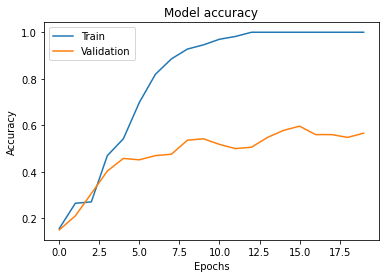

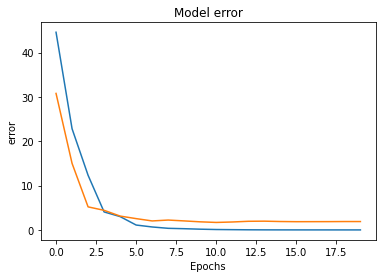

In [48]:
#plot figure
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'],loc='upper_left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model error')
plt.ylabel('error')
plt.xlabel('Epochs')
plt.show()

In [49]:
#save model
model.save('Recognize_fruits_cnn.h5')

In [50]:
CNN_fruits =load_model('Recognize_fruits_cnn.h5')

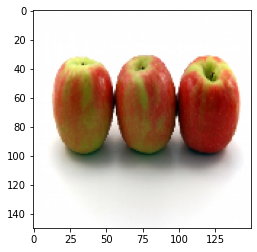

In [51]:
img_path = '/content/drive/MyDrive/AI/Fruits/Train/apples/23.jpg'
img=load_img(img_path,target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
val=np.argmax(CNN_fruits.predict(img),axis=1)
pred = model.predict(img)
classes = ['apple','avocados','bananas','cherries','coconuts','lemons','oranges','passionfruit','raspberries','tomatoes']


In [52]:
if val==0: print('apple')
elif val==1: print('avocados')
elif val==2: print('bananas')
elif val==3: print('cherries')
elif val==4: print('coconuts')
elif val==5: print('lemons')
elif val==6: print('oranges')
elif val==7: print('passionfruit')
elif val==8: print('raspberries')
elif val==9: print('tomatoes')


apple


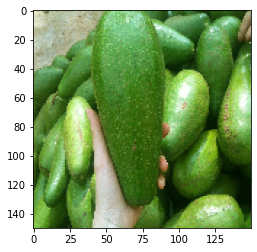

In [53]:
img_path = 'qua_bo.jpg'
img=load_img(img_path,target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
val=np.argmax(CNN_fruits.predict(img),axis=1)
pred = model.predict(img)
classes = ['apple','avocados','bananas','cherries','coconuts','lemons','oranges','passionfruit','raspberries','tomatoes']

In [54]:
if val==0: print('apple')
elif val==1: print('avocados')
elif val==2: print('bananas')
elif val==3: print('cherries')
elif val==4: print('coconuts')
elif val==5: print('lemons')
elif val==6: print('oranges')
elif val==7: print('passionfruit')
elif val==8: print('raspberries')
elif val==9: print('tomatoes')


avocados
